# **Import Library**

In [1]:
# Google Drive Public File/Folder Downloader
# https://pypi.org/project/gdown/
# https://github.com/wkentaro/gdown
!pip install -q gdown

# TFJS converter
# !pip install -q tensorflowjs

In [2]:
import gdown
import keras
import joblib
import numpy as np
import pandas as pd
import tensorflow as tf
from google.colab import files
import matplotlib.pyplot as plt
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.callbacks import LearningRateScheduler

In [3]:
print(tf.__version__)
print(keras.__version__)

2.17.1
3.5.0


# **Import Dataset**

- [How to download Google Drive file using Gdown in Python](https://github.com/wkentaro/gdown?tab=readme-ov-file#via-python)
- [How to download Google Drive file using Gdown in terminal command](https://github.com/wkentaro/gdown?tab=readme-ov-file#via-command-line)
- [How to use Python variable in Google Colab terminal command?](https://stackoverflow.com/questions/52851718/how-to-use-python-variables-in-google-colab-terminal-command)

In [4]:
# File ID from Google Drive link
base_url = "https://drive.google.com/uc?id={id}"
file_id = {
    "old_users_data"              : "16ngL0bfyQqucpYIffxkKiCa3qSGhR26S",
    "new_tourism_with_id_links"   : "1jMd_Sj7t3EvONIJDzg8XuqfcT079LpCa", # Sedikit
    # "new_tourism_with_id_links"   : "10vsiQ3A3kxRkPrIR0rn_qR0ySZ368Pck", # Banyak
    "new_tourism_rating_comments" : "1o-phm0eE64NulxzTLM_FWCyiMbfPHsYt",
    "package_tourism"             : "1LtPNXAnkJde03TFHJXqhIbKvtI_FXJxC"
}

# Download all the dataset file using gdown
for filename, id in file_id.items():
  gdown.download(id=id, output=f"{filename}.csv")      # Using Python
  # !gdown {base_url.format(id=id)} -O {filename}.csv  # Using terminal command

Downloading...
From: https://drive.google.com/uc?id=16ngL0bfyQqucpYIffxkKiCa3qSGhR26S
To: /content/old_users_data.csv
100%|██████████| 17.6k/17.6k [00:00<00:00, 26.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1jMd_Sj7t3EvONIJDzg8XuqfcT079LpCa
To: /content/new_tourism_with_id_links.csv
100%|██████████| 430k/430k [00:00<00:00, 81.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1o-phm0eE64NulxzTLM_FWCyiMbfPHsYt
To: /content/new_tourism_rating_comments.csv
100%|██████████| 906k/906k [00:00<00:00, 56.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1LtPNXAnkJde03TFHJXqhIbKvtI_FXJxC
To: /content/package_tourism.csv
100%|██████████| 9.89k/9.89k [00:00<00:00, 16.9MB/s]


In [5]:
# Load all dataset in Pandas DataFrame
user_df = pd.read_csv("old_users_data.csv")
tourism_df = pd.read_csv("new_tourism_with_id_links.csv")
rating_df = pd.read_csv("new_tourism_rating_comments.csv")
package_df = pd.read_csv("package_tourism.csv")

In [6]:
print("old_users_data.csv"),               display(user_df.sample(3)),     print("\n")
print("new_tourism_rating_comments.csv"),  display(rating_df.sample(3)),   print("\n")
print("package_tourism.csv"),              display(package_df.sample(3)),  print("\n")
print("new_tourism_with_id_links.csv"),    display(tourism_df.sample(3))

old_users_data.csv


,User_Id,Full_Name,Age,Email,Password
158,159,Standford Hubatsch,20,shubatsch4e@google.fr,hK4\Xjm+#Fx
144,145,Mikaela Bartles,37,mbartles40@clickbank.net,kJ3`}Z.Nr+X+78
272,273,Pris Melmar,33,pmelmar7k@yahoo.co.jp,zM9<Ebb7C{q9N)




new_tourism_rating_comments.csv


,User_Id,Place_Id,Place_Ratings,Comment
4858,153,227,3,Alun-Alun Kota Bandung biasa aja sih menurutku...
775,26,53,5,"Berasa kayak mimpi pas di Rumah Sipitung, saki..."
787,27,283,2,"Jembatan Pasupati tuh lokasinya bagus, tapi fa..."




package_tourism.csv


,Package,City,Place_Tourism1,Place_Tourism2,Place_Tourism3,Place_Tourism4,Place_Tourism5
81,82,Surabaya,Museum Sepuluh Nopember Kota Surabaya,Museum Kesehatan Dr. Adhyatma,Patung Buddha Empat Rupa,Museum TNI AL Loka Jala Crana,Keraton Surabaya
98,99,Surabaya,Taman Ekspresi Dan Perpustakaan,Museum De Javasche Bank,Surabaya Museum (Gedung Siola),Museum Mpu Tantular,Taman Air Mancur Menari Kenjeran
58,59,Bandung,Kawasan Punclut,Lawangwangi Creative Space,Curug Tilu Leuwi Opat,Taman Budaya Jawa Barat,Curug Bugbrug




new_tourism_with_id_links.csv


,Place_Id,Place_Name,Category,Description,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Img_Path_0,Img_Path_1,Img_Path_2
85,86,Keraton Yogyakarta,"Budaya, Situs Sejarah",Keraton Ngayogyakarta Hadiningrat atau Keraton...,Yogyakarta,15000,"4,6",NaN,"{'lat': -7.8052845, 'lng': 110.3642031}",-7.805284,110.364203,images_output\Keraton Yogyakarta\Keraton Yogya...,images_output\Keraton Yogyakarta\Keraton Yogya...,images_output\Alun-alun Utara Keraton Yogyakar...
139,140,Bendung Lepen,Taman Hiburan,Bendung Lepen sendiri dulunya merupakan salura...,Yogyakarta,0,"4,6",60.0,"{'lat': -7.831666800000002, 'lng': 110.3945119}",-7.831667,110.394512,images_output\Bendung Lepen\Bendung Lepen_0.jpg,images_output\Bendung Lepen\Bendung Lepen_1.jpg,images_output\Bendung Lepen\Bendung Lepen_2.png
383,384,Kampung Tematik Jawi,Budaya,Tak dipungkiri lagi kalau Kampung Jawi Gunungp...,Semarang,0,"4,5",90.0,"{'lat': -7.029097399999999, 'lng': 110.3775382}",-7.029097,110.377538,images_output\Kampung Tematik Jawi\Kampung Tem...,images_output\Kampung Tematik Jawi\Kampung Tem...,images_output\Kampung Tematik Jawi\Kampung Tem...


(None, None)

# **Data Assessment**


## **user_df**

In [7]:
user_df.sample(5)

,User_Id,Full_Name,Age,Email,Password
189,190,Verne Cromleholme,18,vcromleholme59@theguardian.com,nX1=X}<qZCz
99,100,Peter Wiszniewski,28,pwiszniewski2r@etsy.com,bJ9_+ajuUj`zS
188,189,Weber Luno,21,wluno58@tumblr.com,fU7$n`6(fBM
83,84,Lucille Aylesbury,35,laylesbury2b@vinaora.com,aL2_0&xJ`NMw'$/O
95,96,Hyatt Kimpton,19,hkimpton2n@vimeo.com,lH8<{0bL


In [8]:
print(user_df.info())
user_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   User_Id    300 non-null    int64 
 1   Full_Name  300 non-null    object
 2   Age        300 non-null    int64 
 3   Email      300 non-null    object
 4   Password   300 non-null    object
dtypes: int64(2), object(3)
memory usage: 11.8+ KB
None


,0
User_Id,0
Full_Name,0
Age,0
Email,0
Password,0


## **tourism_df**

In [9]:
tourism_df.sample(3)

,Place_Id,Place_Name,Category,Description,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Img_Path_0,Img_Path_1,Img_Path_2
7,8,Ocean Ecopark,Taman Hiburan,Ocean Ecopark Salah satu zona rekreasi Ancol y...,Jakarta,180000,4,NaN,"{'lat': -6.125801699999999, 'lng': 106.8363249}",-6.125802,106.836325,images_output\Ocean Ecopark\Ocean Ecopark_0.jpg,images_output\Ocean Ecopark\Ocean Ecopark_1.jpg,images_output\Ocean Ecopark\Ocean Ecopark_2.jpg
48,49,Galeri Indonesia Kaya,"Budaya, Situs Sejarah",Galeri Indonesia Kaya (disingkat GIK) adalah r...,Jakarta,0,"4,8",90.0,"{'lat': -6.1948499, 'lng': 106.8200607}",-6.194850,106.820061,images_output\Galeri Indonesia Kaya\Galeri Ind...,images_output\Galeri Indonesia Kaya\Galeri Ind...,images_output\Galeri Indonesia Kaya\Galeri Ind...
256,257,Monumen Bandung Lautan Api,"Budaya, Teater & Pertunjukan","Monumen Bandung Lautan Api, merupakan monumen ...",Bandung,0,"4,3",NaN,"{'lat': -6.9338497, 'lng': 107.604925}",-6.933850,107.604925,images_output\Monumen Bandung Lautan Api\Monum...,images_output\Monumen Bandung Lautan Api\Monum...,NaN


In [10]:
tourism_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Category      437 non-null    object 
 3   Description   437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    object 
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Img_Path_0    437 non-null    object 
 12  Img_Path_1    358 non-null    object 
 13  Img_Path_2    166 non-null    object 
dtypes: float64(3), int64(2), object(9)
memory usage: 47.9+ KB


In [11]:
# Convert Rating columns with commas to proper float format
tourism_df['Rating'] = tourism_df['Rating'].replace(',', '.', regex=True)
tourism_df['Rating'] = tourism_df['Rating'].astype(dtype='float64')
tourism_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Category      437 non-null    object 
 3   Description   437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Img_Path_0    437 non-null    object 
 12  Img_Path_1    358 non-null    object 
 13  Img_Path_2    166 non-null    object 
dtypes: float64(4), int64(2), object(8)
memory usage: 47.9+ KB


In [12]:
tourism_df.isnull().sum()

,0
Place_Id,0
Place_Name,0
Category,0
Description,0
City,0
Price,0
Rating,0
Time_Minutes,232
Coordinate,0
Lat,0


In [13]:
pd.DataFrame({
    'price': tourism_df['Price'].value_counts().index.to_numpy().reshape(-1),
    'count': tourism_df['Price'].value_counts().to_numpy().reshape(-1)
}).sort_values(by='price', ascending=True)

,price,count
0,0,137
24,1000,2
8,2000,14
10,2500,7
7,3000,15
18,4000,3
2,5000,51
33,5500,1
19,6000,3
16,7000,4


In [14]:
# View all unique categories
categories_set = set()
for data in tourism_df['Category'].tolist():
  categories = data.split(', ')
  for category in categories:
    categories_set.add(category)

print(f'Number of categories: {len(categories_set)}')
for index, data in enumerate(categories_set):
  print(index, data)

Number of categories: 9
0 Taman Hiburan
1 Tempat Ibadah
2 Situs Sejarah
3 Bahari
4 Budaya
5 Pusat Perbelanjaan
6 Teater & Pertunjukan
7 Kebun Binatang
8 Cagar Alam


array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Rating'}>],
       [<Axes: title={'center': 'Time_Minutes'}>, <Axes: >]], dtype=object)

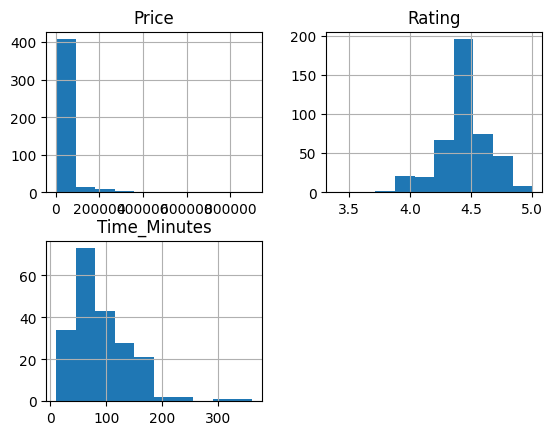

In [15]:
tourism_df[['Price', 'Rating', 'Time_Minutes']].hist()

## **rating_df**

In [16]:
rating_df.sample(3)

,User_Id,Place_Id,Place_Ratings,Comment
9060,284,410,2,"Sebenarnya bisa jadi tempat bagus, tapi Ciputr..."
5134,162,376,3,"Gak buruk sih, tapi aku berharap lebih dari Se..."
3088,98,391,5,Kalau bisa kasih lebih dari 5 bintang buat Flo...


In [17]:
print(rating_df.info())
rating_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9597 entries, 0 to 9596
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   User_Id        9597 non-null   int64 
 1   Place_Id       9597 non-null   int64 
 2   Place_Ratings  9597 non-null   int64 
 3   Comment        9597 non-null   object
dtypes: int64(3), object(1)
memory usage: 300.0+ KB
None


,0
User_Id,0
Place_Id,0
Place_Ratings,0
Comment,0


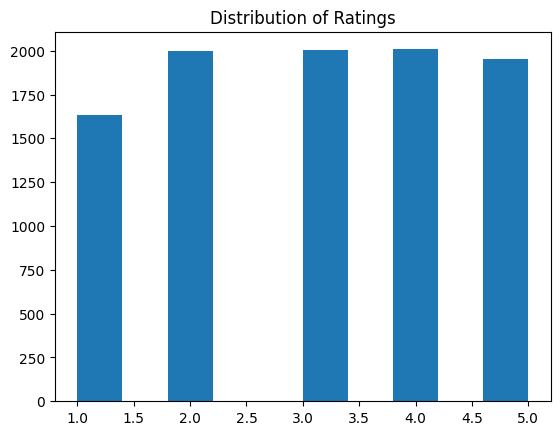

In [18]:
plt.hist(rating_df['Place_Ratings'])
plt.title("Distribution of Ratings")
plt.show()

## **package_df**

In [19]:
print(package_df.info())
package_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Package         100 non-null    int64 
 1   City            100 non-null    object
 2   Place_Tourism1  100 non-null    object
 3   Place_Tourism2  100 non-null    object
 4   Place_Tourism3  100 non-null    object
 5   Place_Tourism4  66 non-null     object
 6   Place_Tourism5  39 non-null     object
dtypes: int64(1), object(6)
memory usage: 5.6+ KB
None


,0
Package,0
City,0
Place_Tourism1,0
Place_Tourism2,0
Place_Tourism3,0
Place_Tourism4,34
Place_Tourism5,61


# **Data Cleaning**

In [20]:
tourism_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Category      437 non-null    object 
 3   Description   437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Img_Path_0    437 non-null    object 
 12  Img_Path_1    358 non-null    object 
 13  Img_Path_2    166 non-null    object 
dtypes: float64(4), int64(2), object(8)
memory usage: 47.9+ KB


In [21]:
# Convert Rating columns with commas to proper float format
tourism_df['Rating'] = tourism_df['Rating'].replace(',', '.', regex=True)
tourism_df['Rating'] = tourism_df['Rating'].astype(dtype='float64')
tourism_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Category      437 non-null    object 
 3   Description   437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Img_Path_0    437 non-null    object 
 12  Img_Path_1    358 non-null    object 
 13  Img_Path_2    166 non-null    object 
dtypes: float64(4), int64(2), object(8)
memory usage: 47.9+ KB


In [22]:
# Fill missing Time_Minutes with the median
tourism_df.fillna({
    'Time_Minutes': tourism_df['Time_Minutes'].median()
}, inplace=True)

In [23]:
tourism_df.isnull().sum()

,0
Place_Id,0
Place_Name,0
Category,0
Description,0
City,0
Price,0
Rating,0
Time_Minutes,0
Coordinate,0
Lat,0


# **Data Transformation**

## **Create `tourism_one_hot_df`**

In [24]:
def get_one_hot_tourism_data(tourism_df: pd.DataFrame) -> tuple[pd.DataFrame, pd.DataFrame]:
  """
  Preprocess the tourism dataframe by applying one-hot encoding to 'Category' and 'City',
  and dropping irrelevant columns.

  Args:
      tourism_df (pd.DataFrame): Original tourism dataframe.

  Returns:
      pd.DataFrame: Processed tourism dataframe with one-hot encoding applied.
  """
  # One-hot encoding for Category and City columns
  categories_one_hot = tourism_df['Category'].str.get_dummies(sep=', ')
  country_one_hot = tourism_df['City'].str.get_dummies()

  # Merge the original dataframe with the one-hot encoding result
  new_tourism_df = pd.concat([tourism_df, country_one_hot, categories_one_hot], axis=1)

  # Drop irrelevant columns
  tourism_one_hot_df = new_tourism_df.drop(columns=[
    'Place_Name', 'Category', 'Description', 'City', 'Coordinate',
    'Lat', 'Long', 'Img_Path_0', 'Img_Path_1', 'Img_Path_2'
  ])

  # tourism_one_hot_df = tourism_one_hot_df.astype(dtype='float64', copy=True)

  return tourism_one_hot_df, new_tourism_df

In [25]:
tourism_one_hot_df, new_tourism_df = get_one_hot_tourism_data(tourism_df)
# tourism_one_hot_df = tourism_one_hot_df.drop(columns=['Price', 'Time_Minutes'])
# 'Kebun Binatang', 'Pusat Perbelanjaan', 'Teater & Pertunjukan', 'Tempat Ibadah'
display(tourism_one_hot_df)
display(tourism_one_hot_df.info())

,Place_Id,Price,Rating,Time_Minutes,Bandung,Jakarta,Semarang,Surabaya,Yogyakarta,Bahari,Budaya,Cagar Alam,Kebun Binatang,Pusat Perbelanjaan,Situs Sejarah,Taman Hiburan,Teater & Pertunjukan,Tempat Ibadah
0,1,20000,4.6,15.0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
1,2,0,4.6,90.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2,3,270000,4.6,360.0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
3,4,10000,4.5,60.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,5,94000,4.5,60.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,433,2000,4.4,45.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
433,434,0,4.6,60.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
434,435,0,4.4,45.0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
435,436,0,4.6,60.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Place_Id              437 non-null    int64  
 1   Price                 437 non-null    int64  
 2   Rating                437 non-null    float64
 3   Time_Minutes          437 non-null    float64
 4   Bandung               437 non-null    int64  
 5   Jakarta               437 non-null    int64  
 6   Semarang              437 non-null    int64  
 7   Surabaya              437 non-null    int64  
 8   Yogyakarta            437 non-null    int64  
 9   Bahari                437 non-null    int64  
 10  Budaya                437 non-null    int64  
 11  Cagar Alam            437 non-null    int64  
 12  Kebun Binatang        437 non-null    int64  
 13  Pusat Perbelanjaan    437 non-null    int64  
 14  Situs Sejarah         437 non-null    int64  
 15  Taman Hiburan         4

None

In [26]:
new_tourism_df.head(3)

,Place_Id,Place_Name,Category,Description,City,Price,Rating,Time_Minutes,Coordinate,Lat,...,Yogyakarta,Bahari,Budaya,Cagar Alam,Kebun Binatang,Pusat Perbelanjaan,Situs Sejarah,Taman Hiburan,Teater & Pertunjukan,Tempat Ibadah
0,1,Monumen Nasional,"Budaya, Situs Sejarah",Monumen Nasional atau yang populer disingkat d...,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,...,0,0,1,0,0,0,1,0,0,0
1,2,Kota Tua,Budaya,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,...,0,0,1,0,0,0,0,0,0,0
2,3,Dunia Fantasi,"Taman Hiburan, Bahari",Dunia Fantasi atau disebut juga Dufan adalah t...,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,...,0,1,0,0,0,0,0,1,0,0


In [27]:
np.save('tourism_vector.npy', tourism_one_hot_df.to_numpy()[:, 1:])

## **Create `average_user_rating_df`**

In [28]:
def get_average_user_rating(new_tourism_df: pd.DataFrame, rating_df: pd.DataFrame) -> pd.DataFrame:
  """
  Calculate the average user ratings for tourism categories.

  This function preprocesses the tourism and rating dataframes to calculate
  the average ratings given by each user for various tourism categories.

  Args:
    new_tourism_df (pd.DataFrame): Dataframe containing tourism place
        information. It must include a 'Place_Id' column and one-hot
        encoded columns for tourism categories.
    rating_df (pd.DataFrame): Dataframe containing user ratings for places
      with columns 'Place_Id', 'User_Id', and 'Place_Ratings'.

  Returns:
    pd.DataFrame: A dataframe with average user ratings for each tourism
      category. The resulting dataframe includes:
        - 'User_Id': Unique identifier for users.
        - Columns corresponding to tourism categories with average ratings
          for each user.
    """

  # Category list
  # categories = [
  #   'Bahari', 'Budaya', 'Cagar Alam', 'Hutan Lindung', 'Kebun Binatang',
  #   'Mall', 'Museum Sejarah', 'Museum Seni', 'Pantai', 'Pasar Tradisional',
  #   'Pulau', 'Pusat Perbelanjaan', 'Pusat Perbelanjaan Mewah', 'Situs Sejarah',
  #   'Suaka Margasatwa', 'Taman Air', 'Taman Bertema', 'Taman Edukasi',
  #   'Taman Hiburan', 'Taman Laut', 'Taman Nasional', 'Taman Rekreasi Anak',
  #   'Teater & Pertunjukan', 'Tempat Ibadah', 'Tempat Menyelam', 'Toko Cinderamata',
  #   'Warisan Arsitektur', 'Water Park'
  # ]

  categories = [
    'Bahari', 'Budaya', 'Cagar Alam', 'Kebun Binatang', 'Pusat Perbelanjaan',
    'Situs Sejarah' , 'Taman Hiburan', 'Teater & Pertunjukan', 'Tempat Ibadah'
  ]

  # Drop unnecessary columns from new_tourism_df
  tourism_category_only_one_hot_df = new_tourism_df.drop(columns=[
    'Place_Name', 'Category', 'Description', 'City', 'Price',
    'Rating', 'Time_Minutes', 'Coordinate', 'Lat', 'Long',
    'Img_Path_0', 'Img_Path_1', 'Img_Path_2', 'Bandung',
    'Jakarta', 'Semarang', 'Surabaya', 'Yogyakarta'
  ])

  # Merge rating_df with tourism_category_only_one_hot_df based on 'Place_Id'
  rating_one_hot_df = rating_df.merge(
      tourism_category_only_one_hot_df, how='inner', on='Place_Id'
  )

  # Copy rating_one_hot_df for calculation
  rating_not_one_hot_df = rating_one_hot_df.copy()

  # Multiply the rating by each category to get a weighted score.
  for category in categories:
    rating_not_one_hot_df[category] *= rating_not_one_hot_df['Place_Ratings']

  # Calculate total ratings and number of ratings per category per user
  total_count = rating_one_hot_df.groupby('User_Id')[categories].sum()
  total_rating = rating_not_one_hot_df.groupby('User_Id')[categories].sum()

  # Average rating for each category
  average_ratings = (total_rating / total_count)
  average_ratings = round(average_ratings, 1)
  average_ratings = average_ratings.fillna(0).reset_index()

  # Add User_Id column to the final result
  average_user_rating_df = pd.concat([total_count.reset_index()[['User_Id']],
                                      average_ratings[categories]], axis=1)

  return average_user_rating_df

In [29]:
average_user_rating_df = get_average_user_rating(new_tourism_df, rating_df)
# average_user_rating_df = average_user_rating_df.drop(columns=['Kebun Binatang', 'Pusat Perbelanjaan', 'Teater & Pertunjukan', 'Tempat Ibadah'])
display(average_user_rating_df)
display(average_user_rating_df.info())

,User_Id,Bahari,Budaya,Cagar Alam,Kebun Binatang,Pusat Perbelanjaan,Situs Sejarah,Taman Hiburan,Teater & Pertunjukan,Tempat Ibadah
0,1,2.0,3.5,3.4,5.0,3.5,3.8,4.0,2.5,2.0
1,2,3.5,3.4,2.9,5.0,0.0,2.0,3.2,3.7,4.0
2,3,4.7,3.3,4.0,0.0,0.0,3.6,3.1,3.5,5.0
3,4,3.7,3.1,3.8,3.0,4.0,2.9,3.7,3.0,0.0
4,5,3.2,3.5,3.0,2.0,5.0,3.7,3.4,3.0,5.0
...,...,...,...,...,...,...,...,...,...,...
295,296,2.7,3.0,3.3,4.0,2.0,2.8,2.8,4.0,2.5
296,297,3.3,3.0,3.0,2.5,1.0,3.0,3.9,4.0,2.3
297,298,3.0,4.2,3.4,1.0,5.0,0.0,3.9,4.0,2.0
298,299,1.8,3.1,2.2,0.0,3.0,3.0,2.5,2.7,4.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   User_Id               300 non-null    int64  
 1   Bahari                300 non-null    float64
 2   Budaya                300 non-null    float64
 3   Cagar Alam            300 non-null    float64
 4   Kebun Binatang        300 non-null    float64
 5   Pusat Perbelanjaan    300 non-null    float64
 6   Situs Sejarah         300 non-null    float64
 7   Taman Hiburan         300 non-null    float64
 8   Teater & Pertunjukan  300 non-null    float64
 9   Tempat Ibadah         300 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 23.6 KB


None

array([[<Axes: title={'center': 'User_Id'}>,
        <Axes: title={'center': 'Bahari'}>,
        <Axes: title={'center': 'Budaya'}>],
       [<Axes: title={'center': 'Cagar Alam'}>,
        <Axes: title={'center': 'Kebun Binatang'}>,
        <Axes: title={'center': 'Pusat Perbelanjaan'}>],
       [<Axes: title={'center': 'Situs Sejarah'}>,
        <Axes: title={'center': 'Taman Hiburan'}>,
        <Axes: title={'center': 'Teater & Pertunjukan'}>],
       [<Axes: title={'center': 'Tempat Ibadah'}>, <Axes: >, <Axes: >]],
      dtype=object)

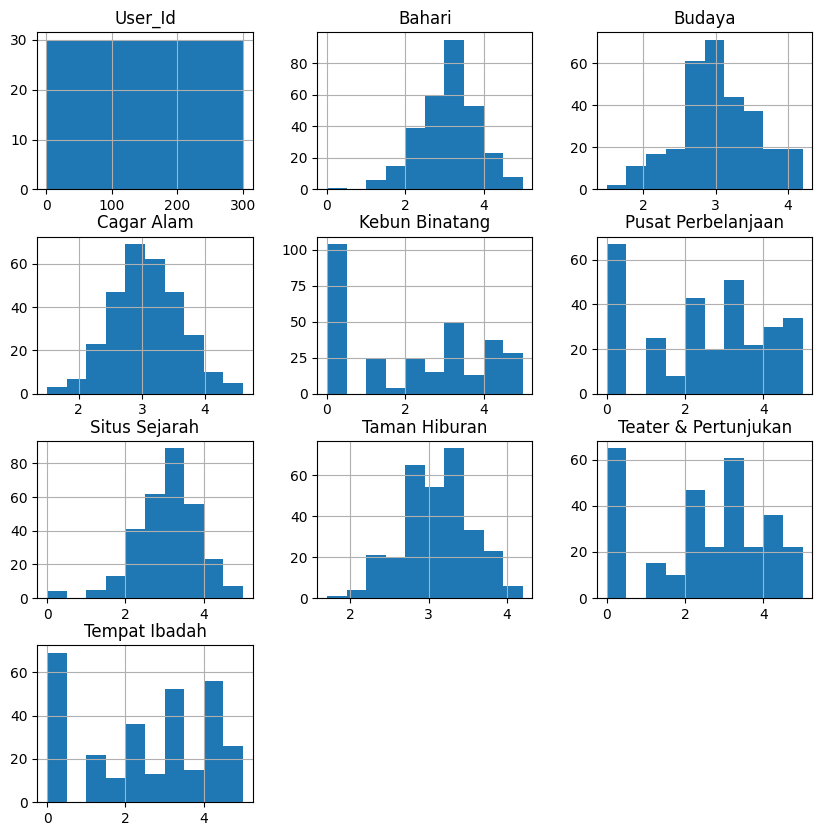

In [30]:
average_user_rating_df.hist(figsize=(10, 10))

In [31]:
np.save('user_vector.npy', average_user_rating_df.to_numpy()[:, 1:])

# **Data Preparation**

## **Create User Vector**

In [32]:
def get_user_vector_df(rating_df: pd.DataFrame, average_user_rating_df: pd.DataFrame) -> pd.DataFrame:
  user_vector_df = rating_df.merge(average_user_rating_df, how='inner', on='User_Id')
  user_vector_df = user_vector_df.drop(columns=['Place_Id', 'Place_Ratings', 'Comment'])
  # user_vector_df = user_vector_df.drop(columns=['User_Id', 'Place_Id', 'Place_Ratings', 'Comment'])
  return user_vector_df

user_vector_df = get_user_vector_df(rating_df, average_user_rating_df)
user_vector = user_vector_df.iloc[:, 1:].to_numpy()
# idx = 0 is the User_Id variable, no need to use it

print(user_vector.shape)
print(user_vector)
display(user_vector_df)

(9597, 9)
[[2.  3.5 3.4 ... 4.  2.5 2. ]
 [2.  3.5 3.4 ... 4.  2.5 2. ]
 [2.  3.5 3.4 ... 4.  2.5 2. ]
 ...
 [3.2 4.  2.8 ... 3.2 0.  4. ]
 [3.2 4.  2.8 ... 3.2 0.  4. ]
 [3.2 4.  2.8 ... 3.2 0.  4. ]]


,User_Id,Bahari,Budaya,Cagar Alam,Kebun Binatang,Pusat Perbelanjaan,Situs Sejarah,Taman Hiburan,Teater & Pertunjukan,Tempat Ibadah
0,1,2.0,3.5,3.4,5.0,3.5,3.8,4.0,2.5,2.0
1,1,2.0,3.5,3.4,5.0,3.5,3.8,4.0,2.5,2.0
2,1,2.0,3.5,3.4,5.0,3.5,3.8,4.0,2.5,2.0
3,1,2.0,3.5,3.4,5.0,3.5,3.8,4.0,2.5,2.0
4,1,2.0,3.5,3.4,5.0,3.5,3.8,4.0,2.5,2.0
...,...,...,...,...,...,...,...,...,...,...
9592,300,3.2,4.0,2.8,0.0,0.0,4.2,3.2,0.0,4.0
9593,300,3.2,4.0,2.8,0.0,0.0,4.2,3.2,0.0,4.0
9594,300,3.2,4.0,2.8,0.0,0.0,4.2,3.2,0.0,4.0
9595,300,3.2,4.0,2.8,0.0,0.0,4.2,3.2,0.0,4.0


## **Create Tourism Vector**

In [33]:
def get_tourism_vector_df(rating_df: pd.DataFrame, tourism_one_hot_df: pd.DataFrame) -> pd.DataFrame:
  tourism_vector_df = rating_df.merge(tourism_one_hot_df, how='left', on='Place_Id')
  tourism_vector_df = tourism_vector_df.drop(columns=['User_Id', 'Place_Ratings', 'Comment'])
  # tourism_vector_df = tourism_vector_df.drop(columns=['User_Id', 'Place_Id', 'Place_Ratings', 'Comment'])
  return tourism_vector_df

tourism_vector_df = get_tourism_vector_df(rating_df, tourism_one_hot_df)
tourism_vector = tourism_vector_df.iloc[:, 1:].to_numpy()
# idx = 0 is the Place_Id variable, no need to use it

print(tourism_vector.shape)
print(tourism_vector)
display(tourism_vector_df.head(5))

(9597, 17)
[[7.5e+04 4.6e+00 9.0e+01 ... 0.0e+00 0.0e+00 0.0e+00]
 [3.0e+03 4.1e+00 6.0e+01 ... 0.0e+00 0.0e+00 0.0e+00]
 [9.4e+04 4.5e+00 6.0e+01 ... 1.0e+00 0.0e+00 0.0e+00]
 ...
 [2.5e+04 4.3e+00 1.5e+02 ... 0.0e+00 0.0e+00 0.0e+00]
 [0.0e+00 4.8e+00 6.0e+01 ... 0.0e+00 0.0e+00 1.0e+00]
 [2.5e+03 4.5e+00 6.0e+01 ... 0.0e+00 0.0e+00 0.0e+00]]


,Place_Id,Price,Rating,Time_Minutes,Bandung,Jakarta,Semarang,Surabaya,Yogyakarta,Bahari,Budaya,Cagar Alam,Kebun Binatang,Pusat Perbelanjaan,Situs Sejarah,Taman Hiburan,Teater & Pertunjukan,Tempat Ibadah
0,179,75000,4.6,90.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
1,344,3000,4.1,60.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
2,5,94000,4.5,60.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,373,10000,4.5,60.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,101,0,4.0,60.0,0,0,0,0,1,0,1,0,0,1,1,0,0,0


## **Create Y Vector**

In [34]:
def get_y_vector(rating_df: pd.DataFrame) -> np.ndarray:
  return rating_df.loc[:, 'Place_Ratings'].copy().to_numpy().reshape(-1, 1)

y = get_y_vector(rating_df)
y

array([[3],
       [2],
       [5],
       ...,
       [3],
       [4],
       [2]])

In [35]:
print(user_vector.shape)
print(tourism_vector.shape)
print(y.shape)

(9597, 9)
(9597, 17)
(9597, 1)


## **Data Splitting**

In [36]:
random_state = 42
test_size = 0.15
val_size = 0.1

# Train-Test Split
user_vector_train, user_vector_test = train_test_split(
    user_vector, test_size=test_size, shuffle=True, random_state=random_state)
tourism_vector_train, tourism_vector_test = train_test_split(
    tourism_vector, test_size=test_size, shuffle=True, random_state=random_state)
y_train, y_test = train_test_split(y, test_size=test_size, shuffle=True, random_state=random_state)

# Train-Validation Split
user_vector_train, user_vector_val = train_test_split(
    user_vector_train, test_size=val_size, shuffle=True, random_state=random_state)
tourism_vector_train, tourism_vector_val = train_test_split(
    tourism_vector_train, test_size=val_size, shuffle=True, random_state=random_state)
y_train, y_val = train_test_split(y_train, test_size=val_size, shuffle=True, random_state=random_state)

print('User Matrix')
print('Train : ', user_vector_train.shape)
print('Val   : ', user_vector_val.shape)
print('Test  : ', user_vector_test.shape, '\n')

print('Tourism Matrix')
print('Train : ', tourism_vector_train.shape)
print('Val   : ', tourism_vector_val.shape)
print('Test  : ', tourism_vector_test.shape, '\n')

print('y Vector')
print('Train : ', y_train.shape)
print('Val   : ', y_val.shape)
print('Test  : ', y_test.shape)

User Matrix
Train :  (7341, 9)
Val   :  (816, 9)
Test  :  (1440, 9) 

Tourism Matrix
Train :  (7341, 17)
Val   :  (816, 17)
Test  :  (1440, 17) 

y Vector
Train :  (7341, 1)
Val   :  (816, 1)
Test  :  (1440, 1)


## **Data Scaling**

In [37]:
# scale training data
user_vector_train_unscaled = user_vector_train
user_vector_val_unscaled = user_vector_val
user_vector_test_unscaled = user_vector_test

tourism_vector_train_unscaled = tourism_vector_train
tourism_vector_val_unscaled = tourism_vector_val
tourism_vector_test_unscaled = tourism_vector_test

y_train_unscaled = y_train
y_val_unscaled = y_val
y_test_unscaled = y_test

user_scaler = StandardScaler()
user_vector_train_scaled = user_scaler.fit_transform(user_vector_train)
user_vector_val_scaled = user_scaler.transform(user_vector_val)
user_vector_test_scaled = user_scaler.transform(user_vector_test)

tourism_scaler = StandardScaler()
tourism_vector_train_scaled = tourism_scaler.fit_transform(tourism_vector_train)
tourism_vector_val_scaled = tourism_scaler.transform(tourism_vector_val)
tourism_vector_test_scaled = tourism_scaler.transform(tourism_vector_test)

target_scaler = MinMaxScaler()
y_train_scaled = target_scaler.fit_transform(y_train)
y_val_scaled = target_scaler.transform(y_val)
y_test_scaled = target_scaler.transform(y_test)

print(np.allclose(tourism_vector_train_unscaled, tourism_scaler.inverse_transform(tourism_vector_train_scaled)))
print(np.allclose(tourism_vector_val_unscaled, tourism_scaler.inverse_transform(tourism_vector_val_scaled)))
print(np.allclose(tourism_vector_test_unscaled, tourism_scaler.inverse_transform(tourism_vector_test_scaled)))

print(np.allclose(user_vector_train_unscaled, user_scaler.inverse_transform(user_vector_train_scaled)))
print(np.allclose(user_vector_val_unscaled, user_scaler.inverse_transform(user_vector_val_scaled)))
print(np.allclose(user_vector_test_unscaled, user_scaler.inverse_transform(user_vector_test_scaled)))

print(np.allclose(y_train_unscaled, target_scaler.inverse_transform(y_train_scaled)))
print(np.allclose(y_val_unscaled, target_scaler.inverse_transform(y_val_scaled)))
print(np.allclose(y_test_unscaled, target_scaler.inverse_transform(y_test_scaled)))

True
True
True
True
True
True
True
True
True


In [38]:
joblib.dump(user_scaler, 'user_scaler.gz')
joblib.dump(tourism_scaler, 'tourism_scaler.gz')
joblib.dump(target_scaler, 'target_scaler.gz')

['target_scaler.gz']

In [39]:
!zip scaler.zip *.gz
# files.download("/content/scaler.zip")

  adding: target_scaler.gz (stored 0%)
  adding: tourism_scaler.gz (stored 0%)
  adding: user_scaler.gz (stored 0%)


# **Training & Evaluation**

## **Create Model**

In [121]:
# Custom layer for L2 normalization
# https://www.tensorflow.org/guide/keras/serialization_and_saving#custom_objects
@keras.saving.register_keras_serializable(package="ContentBased")
class L2NormalizeLayer(tf.keras.layers.Layer):
    def __init__(self, axis=1, **kwargs):
        super(L2NormalizeLayer, self).__init__(**kwargs)
        self.axis = axis

    def call(self, inputs):
        return tf.math.l2_normalize(inputs, axis=self.axis)

    def get_config(self):
        return {'axis': self.axis}

In [122]:
num_outputs = 10 # Vector result dimensions
tf.random.set_seed(42)

user_NN = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation="relu", kernel_regularizer=l2(0.01)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(num_outputs)
])

tourism_NN = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation="relu", kernel_regularizer=l2(0.01)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(num_outputs)
])

input_user = tf.keras.layers.Input(shape=(user_vector_train.shape[1],))
vu = user_NN(input_user)
vu = L2NormalizeLayer(axis=1)(vu)
# vu = tf.keras.layers.Lambda(lambda x: tf.math.l2_normalize(x, axis=1), output_shape=(num_outputs,))(vu)

input_tourism = tf.keras.layers.Input(shape=(tourism_vector_train.shape[1],))
vt = tourism_NN(input_tourism)
vt = L2NormalizeLayer(axis=1)(vt)
# vt = tf.keras.layers.Lambda(lambda x: tf.math.l2_normalize(x, axis=1), output_shape=(num_outputs,))(vt)

output = tf.keras.layers.Dot(axes=1)([vu, vt])

model = tf.keras.Model([input_user, input_tourism], output)
model.summary()

Model: "functional_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_15            │ (None, 9)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_17            │ (None, 17)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_6 (Sequential) │ (None, 10)             │          3,050 │ input_layer_15[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_7 (Sequential) │ (None, 10)             │          3,562 │ input_layer_17[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ l2_normalize_layer_15     │ (None, 10)             │              0 │ sequential_6[0][0]     │
│ (L2NormalizeLayer)        │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ l2_normalize_layer_16     │ (None, 10)             │              0 │ sequential_7[0][0]     │
│ (L2NormalizeLayer)        │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dot_3 (Dot)               │ (None, 1)              │              0 │ l2_normalize_layer_15… │
│                           │                        │                │ l2_normalize_layer_16… │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 6,612 (25.83 KB)

 Trainable params: 6,612 (25.83 KB)

 Non-trainable params: 0 (0.00 B)

## **Tranining Model**

In [123]:
cost = tf.keras.losses.MeanAbsoluteError()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=cost, metrics=['root_mean_squared_error'])

lr_schedule = LearningRateScheduler(lambda epoch: 0.001 * 0.1**(epoch // 10))
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit([user_vector_train_scaled, tourism_vector_train_scaled], y_train_scaled,
                    validation_data=([user_vector_val_scaled, tourism_vector_val_scaled], y_val_scaled),
                    epochs=45, callbacks=[lr_schedule, early_stopping])

Epoch 1/45
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.6764 - root_mean_squared_error: 0.4155 - val_loss: 0.4439 - val_root_mean_squared_error: 0.3397 - learning_rate: 0.0010
Epoch 2/45
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4155 - root_mean_squared_error: 0.3441 - val_loss: 0.3403 - val_root_mean_squared_error: 0.3379 - learning_rate: 0.0010
Epoch 3/45
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3345 - root_mean_squared_error: 0.3397 - val_loss: 0.3065 - val_root_mean_squared_error: 0.3329 - learning_rate: 0.0010
Epoch 4/45
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3073 - root_mean_squared_error: 0.3374 - val_loss: 0.2980 - val_root_mean_squared_error: 0.3348 - learning_rate: 0.0010
Epoch 5/45
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2957 - root_mean_squared_error: 0.3346 - val_loss: 0.2910 - val_root_mean_squared_error: 0.3344 - learning_rate: 0.0010
Epoch 6/45
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2899 - root_mean_squared_err

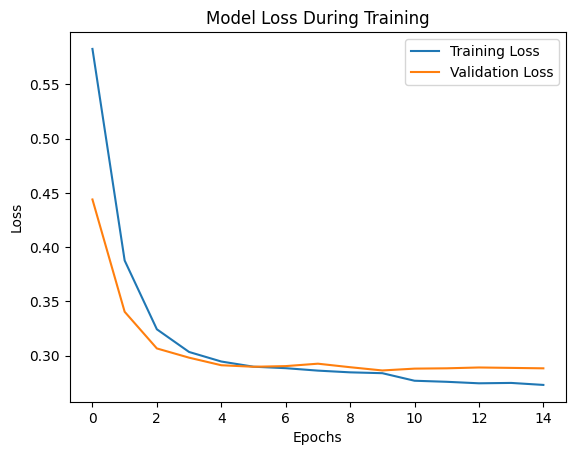

In [124]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## **Check Results**

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3019 - root_mean_squared_error: 0.3485
Test Loss: 0.2977280020713806, Test RMSE: 0.3438602387905121
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


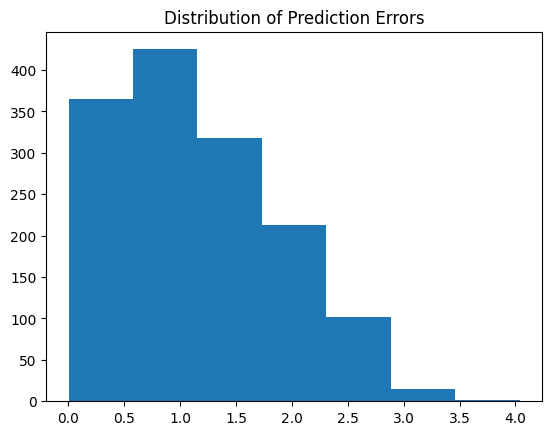

In [125]:
test_loss, test_rmse = model.evaluate([user_vector_test_scaled, tourism_vector_test_scaled], y_test_scaled)
print(f"Test Loss: {test_loss}, Test RMSE: {test_rmse}")

y_pred = model.predict([user_vector_test_scaled, tourism_vector_test_scaled])
errors = np.abs(target_scaler.inverse_transform(y_test_scaled) - target_scaler.inverse_transform(y_pred))

plt.hist(errors, bins=7)
plt.title("Distribution of Prediction Errors")
plt.show()

In [126]:
display(model.evaluate([user_vector_train_scaled, tourism_vector_train_scaled], y_train_scaled))  # train
display(model.evaluate([user_vector_val_scaled, tourism_vector_val_scaled], y_val_scaled))        # val
display(model.evaluate([user_vector_test_scaled, tourism_vector_test_scaled], y_test_scaled))     # test

230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2718 - root_mean_squared_error: 0.3191


[0.27478665113449097, 0.32201942801475525]

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2922 - root_mean_squared_error: 0.3442 


[0.2862358093261719, 0.33528631925582886]

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3019 - root_mean_squared_error: 0.3485


[0.2977280020713806, 0.3438602387905121]

In [127]:
# Check training results
y_train_pred = model.predict([user_vector_train_scaled, tourism_vector_train_scaled])
y_train_pred = target_scaler.inverse_transform(y_train_pred)

train_comparison_results = pd.DataFrame({
    'y_train_pred': y_train_pred.reshape(-1),
    'y_train_real': y_train_unscaled.reshape(-1)
})

train_comparison_results

230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,y_train_pred,y_train_real
0,3.784199,4
1,2.642180,2
2,2.592220,3
3,4.171841,5
4,2.943792,2
...,...,...
7336,2.491600,3
7337,3.383424,2
7338,2.418563,1
7339,4.173376,3


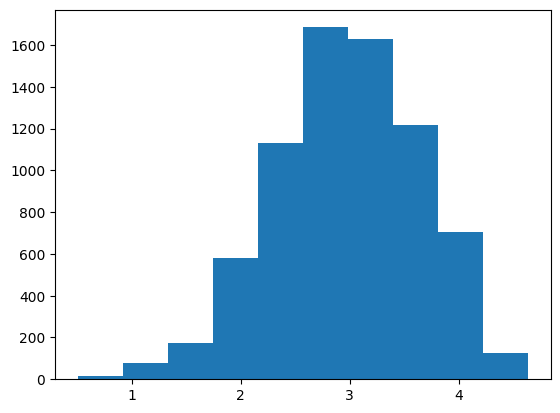

In [128]:
plt.hist(y_train_pred)
plt.show()

In [129]:
# Check validation results
y_val_pred = model.predict([user_vector_val_scaled, tourism_vector_val_scaled])
y_val_pred = target_scaler.inverse_transform(y_val_pred)

val_comparison_results = pd.DataFrame({
    'y_val_pred': y_val_pred.reshape(-1),
    'y_val_real': y_val_unscaled.reshape(-1)
})

val_comparison_results

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


,y_val_pred,y_val_real
0,3.671602,1
1,2.606229,1
2,3.617782,1
3,2.834842,4
4,4.262385,4
...,...,...
811,3.521724,5
812,2.720315,4
813,1.917725,2
814,3.462189,2


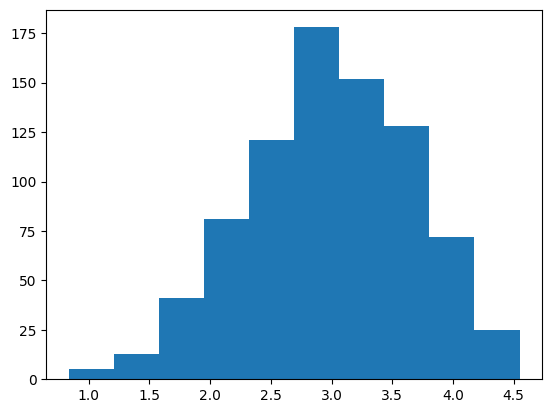

In [130]:
plt.hist(y_val_pred)
plt.show()

In [131]:
# Check test results
y_test_pred = model.predict([user_vector_test_scaled, tourism_vector_test_scaled])
y_test_pred = target_scaler.inverse_transform(y_test_pred)

test_comparison_results = pd.DataFrame({
    'y_test_pred': y_test_pred.reshape(-1),
    'y_test_real': y_test_unscaled.reshape(-1)
})

test_comparison_results

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,y_test_pred,y_test_real
0,4.131972,2
1,3.517742,2
2,3.038192,5
3,4.173797,5
4,3.143449,1
...,...,...
1435,2.880504,4
1436,3.506005,3
1437,3.656594,3
1438,2.842789,2


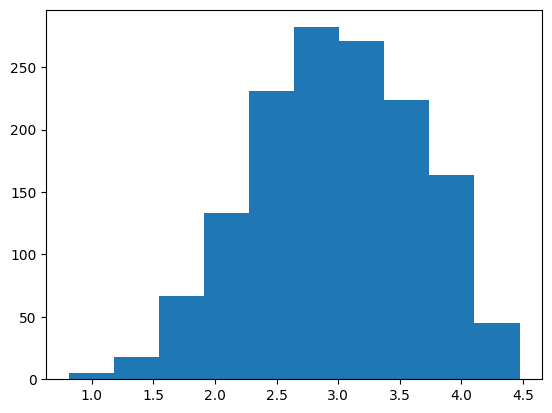

In [132]:
plt.hist(y_test_pred)
plt.show()

## **Predict 1**

In [133]:
# user_id = z
# city = 'Surabaya'

# tourism_vecs_idx = tourism_one_hot_df.loc[tourism_one_hot_df[city] == 1, :].index
# tourism_city_df = tourism_df.iloc[tourism_vecs_idx, :].reset_index(drop=True)
# tourism_city_one_hot_df = tourism_one_hot_df.iloc[tourism_vecs_idx, 1:].reset_index(drop=True)
# scaled_tourism_vecs = tourism_scaler.transform(tourism_city_one_hot_df.to_numpy())
# display(scaled_tourism_vecs.shape)

# current_user_data = average_user_rating_df.loc[average_user_rating_df['User_Id'] == user_id, :].drop(columns='User_Id')
# current_user_vecs = np.tile(current_user_data.to_numpy(), (len(tourism_vecs_idx), 1))
# scaled_current_user_vecs = user_scaler.transform(current_user_vecs)
# display(scaled_current_user_vecs.shape)
# display(current_user_data)

# # make a prediction
# y_p = model.predict([scaled_current_user_vecs, scaled_tourism_vecs])

# # unscale y prediction
# y_pu = target_scaler.inverse_transform(y_p)

# # # sort the results, highest prediction first
# sorted_index = np.argsort(-y_pu, axis=0).reshape(-1).tolist()  #negate to get largest rating first
# sorted_ypu   = y_pu[sorted_index].reshape(-1)
# sorted_items = tourism_vecs[sorted_index].reshape(-1) #using unscaled vectors for display
# # sorted_index.tolist()
# result = tourism_city_df.loc[sorted_index, ['Place_Name', 'Category', 'City']]
# result['y_p'] = sorted_ypu

In [134]:
user_id = 5
city = 'Jakarta'

current_user_data = average_user_rating_df.loc[average_user_rating_df['User_Id'] == user_id, :].drop(columns='User_Id')
current_user_vecs = np.tile(current_user_data.to_numpy(), (len(tourism_df), 1))
scaled_current_user_vecs = user_scaler.transform(current_user_vecs)
display(scaled_current_user_vecs.shape)

tourism_vecs = tourism_one_hot_df.iloc[:, 1:].to_numpy()
scaled_tourism_vecs = tourism_scaler.transform(tourism_vecs)
display(scaled_tourism_vecs.shape)

display(current_user_data)

# make a prediction
y_p = model.predict([scaled_current_user_vecs, scaled_tourism_vecs])

# unscale y prediction
y_pu = target_scaler.inverse_transform(y_p)

# # sort the results, highest prediction first
sorted_index = np.argsort(-y_pu, axis=0).reshape(-1)  #negate to get largest rating first
sorted_ypu   = y_pu[sorted_index].reshape(-1)
sorted_items = tourism_vecs[sorted_index].reshape(-1) #using unscaled vectors for display

result = tourism_df.loc[sorted_index, ['Place_Name', 'Category', 'City']]
result['Rating_Prediction'] = sorted_ypu

(437, 9)

(437, 17)

,Bahari,Budaya,Cagar Alam,Kebun Binatang,Pusat Perbelanjaan,Situs Sejarah,Taman Hiburan,Teater & Pertunjukan,Tempat Ibadah
4,3.2,3.5,3.0,2.0,5.0,3.7,3.4,3.0,5.0


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [135]:
result.loc[result['City'] == city, :]

,Place_Name,Category,City,Rating_Prediction
54,Klenteng Jin De Yuan,"Tempat Ibadah, Budaya, Situs Sejarah",Jakarta,4.206242
21,Masjid Istiqlal,Tempat Ibadah,Jakarta,4.169106
22,Gereja Katedral,Tempat Ibadah,Jakarta,4.158411
51,Kampung Cina,"Budaya, Situs Sejarah, Pusat Perbelanjaan",Jakarta,4.140239
72,Museum Perangko,Budaya,Jakarta,4.063707
...,...,...,...,...
36,Bumi Perkemahan Cibubur,Taman Hiburan,Jakarta,2.646986
3,Taman Mini Indonesia Indah (TMII),Taman Hiburan,Jakarta,2.646986
46,Taman Situ Lembang,"Taman Hiburan, Situs Sejarah",Jakarta,2.643884
29,Taman Menteng,Taman Hiburan,Jakarta,2.640803


## **Predict 2**

In [136]:
# GRADED_FUNCTION: sq_dist
# UNQ_C2
def sq_dist(a,b):
    """
    Returns the squared distance between two vectors
    Args:
      a (ndarray (n,)): vector with n features
      b (ndarray (n,)): vector with n features
    Returns:
      d (float) : distance
    """
    ### START CODE HERE ###
    d = np.sum(np.square(a - b))
    ### END CODE HERE ###
    return d

In [137]:
a1 = np.array([1.0, 2.0, 3.0]); b1 = np.array([1.0, 2.0, 3.0])
a2 = np.array([1.1, 2.1, 3.1]); b2 = np.array([1.0, 2.0, 3.0])
a3 = np.array([0, 1, 0]);       b3 = np.array([1, 0, 0])
print(f"squared distance between a1 and b1: {sq_dist(a1, b1):0.3f}")
print(f"squared distance between a2 and b2: {sq_dist(a2, b2):0.3f}")
print(f"squared distance between a3 and b3: {sq_dist(a3, b3):0.3f}")

squared distance between a1 and b1: 0.000
squared distance between a2 and b2: 0.030
squared distance between a3 and b3: 2.000


In [138]:
# Jadi di sini kita cuma mau ambil (semacam) nilai embedding dari NN nya movie aja yang berdimensi 32 (32 dari exercise 1)
input_item_t = tf.keras.layers.Input(shape=(tourism_vector_train.shape[1],))    # input layer
vt_t = tourism_NN(input_item_t)
vt_t = L2NormalizeLayer(axis=1)(vt_t)                                    # incorporate normalization as was done in the original model
model_t = tf.keras.Model(input_item_t, vt_t)
model_t.summary()

Model: "functional_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_19 (InputLayer)          │ (None, 17)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_7 (Sequential)            │ (None, 10)                  │           3,562 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ l2_normalize_layer_17                │ (None, 10)                  │               0 │
│ (L2NormalizeLayer)                   │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,562 (13.91 KB)

 Trainable params: 3,562 (13.91 KB)

 Non-trainable params: 0 (0.00 B)

In [139]:
tourism_vecs = tourism_one_hot_df.iloc[:, 1:].to_numpy()
scaled_tourism_vecs = tourism_scaler.transform(tourism_vecs)
vts = model_t.predict(scaled_tourism_vecs)
print(f"size of all predicted movie feature vectors: {vts.shape}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
size of all predicted movie feature vectors: (437, 10)


In [140]:
count = 50  # number of movies to display
dim = len(vts)  # 847
dist = np.zeros((dim,dim))  # (847, 847)

for i in range(dim):
    for j in range(dim):
        dist[i,j] = sq_dist(vts[i, :], vts[j, :])

# m_dist = dist yang diagonalnya sudah ditutup, karena nilai similarity nya pasti 1 (karena movie nya sama)
m_dist = np.ma.masked_array(dist, mask=np.identity(dist.shape[0]))  # mask the diagonal

In [141]:
tourism_vector_df.loc[5, 'Place_Id']

312

In [142]:
# Intinya ini mendapatkan 1 movie paling similar dari setiap movie
header = ["tourism1", "category1", "tourism2", "category2"]
disp = list()
for i in range(count):
    min_idx = np.argmin(m_dist[i])  # Mendapatkan index dari nilai similarity terkecil di movie ke-i
    movie1_id = int(tourism_df.loc[i, 'Place_Id']) - 1  # Mendapatkan index dari movie asal
    movie2_id = int(tourism_df.loc[min_idx, 'Place_Id']) - 1  # Mendapatkan idex dari movie yang paling mirip
    disp.append( [tourism_df.loc[movie1_id, 'Place_Name'], tourism_df.loc[movie1_id, 'Category'],
                  tourism_df.loc[movie2_id, 'Place_Name'], tourism_df.loc[movie2_id, 'Category']]
               )

In [143]:
disp_df = pd.DataFrame(disp, columns=header)
disp_df

,tourism1,category1,tourism2,category2
0,Monumen Nasional,"Budaya, Situs Sejarah",Monumen Selamat Datang,"Budaya, Situs Sejarah"
1,Kota Tua,Budaya,Museum Taman Prasasti,Budaya
2,Dunia Fantasi,"Taman Hiburan, Bahari",Kidzania,"Taman Hiburan, Bahari"
3,Taman Mini Indonesia Indah (TMII),Taman Hiburan,Bumi Perkemahan Cibubur,Taman Hiburan
4,Atlantis Water Adventure,Taman Hiburan,Cibubur Garden Diary (Cibugary),Taman Hiburan
5,Taman Impian Jaya Ancol,"Taman Hiburan, Bahari",Pantai Krakal,"Taman Hiburan, Bahari"
6,Kebun Binatang Ragunan,"Cagar Alam, Taman Hiburan",Taman Cattleya,"Taman Hiburan, Cagar Alam"
7,Ocean Ecopark,Taman Hiburan,SnowBay Waterpark,Taman Hiburan
8,Pelabuhan Marina,Bahari,Pulau Tidung,Bahari
9,Pulau Tidung,Bahari,Pelabuhan Marina,Bahari


## **Save Model**

In [144]:
model.save('content_based.h5')

In [145]:
new_model = tf.keras.models.load_model('content_based.h5')

45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


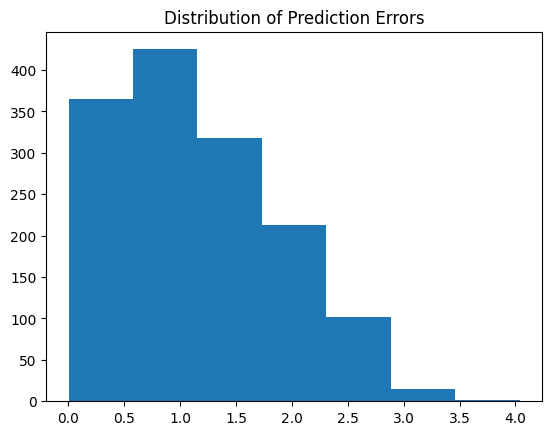

In [146]:
y_pred = new_model.predict([user_vector_test_scaled, tourism_vector_test_scaled])
errors = np.abs(target_scaler.inverse_transform(y_test_scaled) - target_scaler.inverse_transform(y_pred))

plt.hist(errors, bins=7)
plt.title("Distribution of Prediction Errors")
plt.show()

In [147]:
# !tensorflowjs_converter --input_format=keras content_based_ml.h5 content_based_ml